In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

In [2]:
np.random.randint(0,2,100)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

# 排列组合计算 n是元素的总个数，m是参数排列组合的个数，!是阶乘


### 阶乘算法 $n!=1×2×3×...×(n-1)×n。阶乘亦可以递归方式定义：0!=1，n!=(n-1)!×n$

In [3]:
def factorial(N):
    n = 1
    for i in range(1,N+1):
        n *= i
    return n

### numpy阶乘模块验证

In [4]:
np.math.factorial(10)-factorial(10)

0

In [5]:
np.math.factorial(10)

3628800

### 排列公式 $A(n,k)=n(n-1)....(n-k+1)=n!/(n-k)!$ 

In [6]:
def Ank(n,k):
    return factorial(n)/factorial(n-k)

In [7]:
Ank(3,2)

6.0

In [8]:
def Ankndarray(n,k):
    return np.math.factorial(n)/np.math.factorial(n-k)

In [9]:
Ankndarray(3,2)

6.0

### 组合公式 $C(n,k) ={A(n,k)/k!} = n!/k!(n-k)! = C_n^{n-k}$

In [10]:
def Cnk(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

In [11]:
Cnk(3,2)

3.0

In [12]:
def Cnkndarray(n,k):
    return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))

In [13]:
Cnk(3,2)

3.0

# 排列组合返回元素 (python标准库)

In [14]:
example1 = ['a','b','c']

### product 笛卡尔积　　（有放回抽样排列）

In [15]:
list(itertools.product(example1,repeat=2))

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'c')]

### permutations 排列　　（不放回抽样排列）

In [16]:
list(itertools.permutations(example1,2))

[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]

### combinations 组合,没有重复　　（不放回抽样组合）

In [17]:
list(itertools.combinations(example1, 2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]

### combinations_with_replacement 组合,有重复　　（有放回抽样组合)

In [18]:
list(itertools.combinations_with_replacement(example1, 2))

[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'b'), ('b', 'c'), ('c', 'c')]

# 排列numpy实现就比较鸡肋了，至少不是很好用

In [19]:
np.random.permutation(3)

array([2, 0, 1])

# 概率分布计算 
# 伯努利分布（二项分布）
### $ P(X=k) = C(n,k)*(P^{k})*[(1-p)^{(n-k)}]  $
### $ n是全不的组合元素数，X=k是选择的组合长度，P是事件单独发生的概率 $

In [20]:
def bernoulliDistribution(n,X,P):
    k = X
    return Cnk(n,k)*(P**k)*((1-P)**(n-k))

In [21]:
def bernoulliDistributionNDarray(n,X,P):
    k=X
    return Cnkndarray(n,k)*((P**k)*(1-P)**(n-k))

## 验证函数

## 概率分布计算
### 通过 n 和 p，我们可以计算出 X 取 0~n 中任何整数值 k 的概率：
### 例子 : 连续 10 次投硬币，正面朝上的次数 X=5 的概率：
### $P(X=5) = C(10, 5)*(0.5^{5})[(1-0.5)^{10-5}]$
### = 252 * (0.5^10) ~ 0.246
###（大约 1/4）

In [22]:
Cnk(10,5)*0.5**5*((1-0.5)**(10-5))

0.24609375

## n 表示抛10次银币，X表示正面朝上的次数，P是单次成功概率
## 事件发生的概率是

In [23]:
bernoulliDistribution(n=10,X=5,P=0.5)

0.24609375

In [24]:
bernoulliDistributionNDarray(10,5,0.5)

0.24609375

## 需要多少次才能成功呢？

In [25]:
def Ep(n,k,P):
    return 1/bernoulliDistribution(n,k,P)
Ep(n=10,k=5,P=0.5)

4.063492063492063

观察一下，当成功概率变动时候，发生了什么

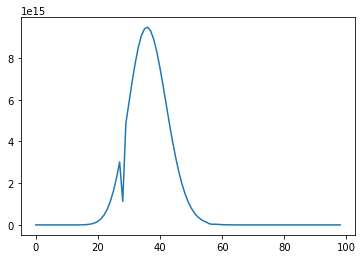

In [26]:
data = np.array([[i/100,Ep(int(100*(i/100)),int(100*(i/100)),i/100),5] for i in range(1,100)])
plt.plot(data[:,1:2])

【期望和方差】
二项分布的期望（均值）为 np，方差为 np(1-p)。（推导过程不难，不会也可以问问搜索引擎）

----------------
二项分布告诉我们：想要“期望 ”大，那就提升 n 和 p。

（限制了 p，就想法扩大 n）
* 而如果客观条件约束了胜算，只要“期望”收益为正，那就追求多次可重复。
例如，赌场，保险公司，风险投资……

大量可重复，概率的规律才有意义。
因为少量的“试验”次数，难以支撑那一点微小的概率优势；只有不断扩大 n，“运气”才会收敛到“期望”。

（限制了 n，就努力提升 p）
* 对难得的机会，最好事前充分地准备，提升成功概率，降低不确定性。
例如，错过等一年的高考，理想的职位面试，或者一些重要的仪式，甚至是“do or die”……

最怕的就是，当机会到来，只能遗憾地说：抱歉我还没准备好……
只有做足了准备，才能有底气的在成功之后说一句：这是我应得的！

$

# 柏松分布

### 柏松部分是一种特殊的伯努利分布，公式是
# $ P( X = k ) = e^{\lambda}\lambda^{k}/k! $
### $n是实验的次数，p是实验出现情况可能性的乘积，\lambda是n*p的乘积$

### 例子：
### 每天早上有一个同事小美会给大家带10份早饭，先到先得，每个员工8点以前能到公司的概率是10%。
### 公司员工100人，每个人每天到达公司的时间是随机的，且无相关性，不存在商量的情况
### 新来的员工小曹，能够吃上早饭的概率是多少？
### $ n = 100  $ : <-总人数是100
### $ p = 0.1 $ : <-八点以前到公司的概率是10%
### $ \lambda = 100*0.1 = 10 $ : <-也就是能吃到早餐的人数
### $ (X = k) :  $ <- 小美只带10份早饭，所以k的集合是={0,1,2...9}，也就是已经被领取的早饭数量的顺序值

In [27]:
import pandas as pd

## 计算柏松分布

In [28]:
def pocssonDistribution(n,k,p):
    Lambda = n*p
    probability = np.array([(np.exp(-Lambda)*Lambda**ki)/np.math.factorial(ki) for ki in range(k+1)])
    cumulativeProbability = np.array([np.dot(probability[:i],np.ones(i)) for i in range(1,len(probability)+1)])
    return probability[:-1],cumulativeProbability[:-1],Lambda

## 带入值计算

In [29]:
probability,cumulativeProbability,Lambda = pocssonDistribution(100,10,0.1)
probability,cumulativeProbability,Lambda

(array([4.53999298e-05, 4.53999298e-04, 2.26999649e-03, 7.56665496e-03,
        1.89166374e-02, 3.78332748e-02, 6.30554580e-02, 9.00792257e-02,
        1.12599032e-01, 1.25110036e-01]),
 array([4.53999298e-05, 4.99399227e-04, 2.76939572e-03, 1.03360507e-02,
        2.92526881e-02, 6.70859629e-02, 1.30141421e-01, 2.20220647e-01,
        3.32819679e-01, 4.57929714e-01]),
 10.0)

## 柏松分布概率表

In [30]:
def pocssonDistribution_to_table(n,k,p):
    probability,cumulativeProbability,Lambda = pocssonDistribution(n,k,p)
    return pd.DataFrame({'k':range(1,len(probability)+1),'Lambda':Lambda,'单次概率':probability,'累计概率':cumulativeProbability})

In [31]:
Ptable = pocssonDistribution_to_table(100,20,0.1)
Ptable.head()

,k,Lambda,单次概率,累计概率
0,1,10.0,0.000045,0.000045
1,2,10.0,0.000454,0.000499
2,3,10.0,0.002270,0.002769
3,4,10.0,0.007567,0.010336
4,5,10.0,0.018917,0.029253


$ 如果k超过\lambda，则概率开始朝下走$
#### 这也符合正常的直觉，当需要早餐的人越来越多时，8点能够拿到早餐的概率就会降低


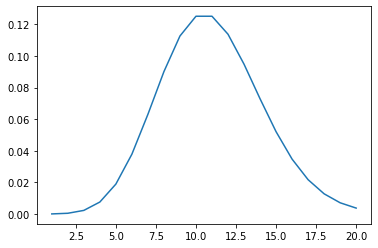

In [32]:
plt.plot(Ptable.k,Ptable.单次概率)

## 解读上面的表:
## k代表累计已经被领取的早餐:
## 可以看到，无论是累计还是单次的概率，都随着k值增加，也就是说，8点整点领取第几份早餐的相应概率也在增加

## 红色的是单次概率，绿色的是累计概率

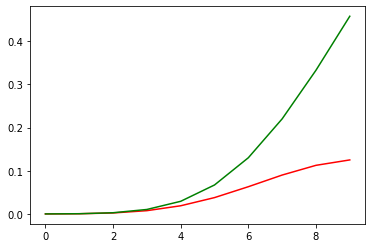

In [33]:
plt.plot(probability,c='r')
plt.plot(cumulativeProbability,c='g')

## 通过计算得到，如果在整点8到达，能吃到小美的饭的概率就是45.7%
# 如果公司员工人数发生变动呢？比如减少60人，可能性依然是10%

## 100人

In [34]:
pocssonDistribution_to_table(100,10,0.1)[9:10]

,k,Lambda,单次概率,累计概率
9,10,10.0,0.12511,0.45793


## 40人

In [35]:
pocssonDistribution_to_table(40,4,0.1)[3:4]

,k,Lambda,单次概率,累计概率
3,4,4.0,0.195367,0.43347


## 10人

In [36]:
pocssonDistribution_to_table(10,1,0.1)

,k,Lambda,单次概率,累计概率
0,1,1.0,0.367879,0.367879


## 200人

In [37]:
pocssonDistribution_to_table(200,20,0.1)[19:20]

,k,Lambda,单次概率,累计概率
19,20,20.0,0.088835,0.470257


## 可以看到，当n和k增大时，概率不变，则n越大，能够吃到的早餐的可能性越大,但是百分之50%是一个上限，继续增加人数，效率并不高

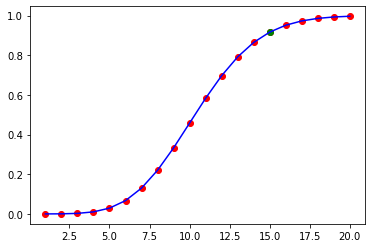

In [38]:
table = pocssonDistribution_to_table(100,20,0.1)
plt.plot(table.k,table.累计概率,c='b')
plt.scatter(table.k,table.累计概率,c='r')
plt.scatter(table.k[14:15],table.累计概率[14:15],c='g')
plt.show()
plt.close()

In [39]:
pocssonDistribution_to_table(1000,100,0.1)[99:100]

,k,Lambda,单次概率,累计概率
99,100,100.0,0.039861,0.486701


## 如果增加早餐的份数也就是k的上限，也就是增加冗余，则可以很高效的解决这个问题

In [40]:
addK = pocssonDistribution_to_table(100,100,0.1)

In [41]:
addK[addK.k==11]

,k,Lambda,单次概率,累计概率
10,11,10.0,0.12511,0.58304


In [42]:
addK[addK.k==12]

,k,Lambda,单次概率,累计概率
11,12,10.0,0.113736,0.696776


In [43]:
addK[addK.k==13]

,k,Lambda,单次概率,累计概率
12,13,10.0,0.09478,0.791556


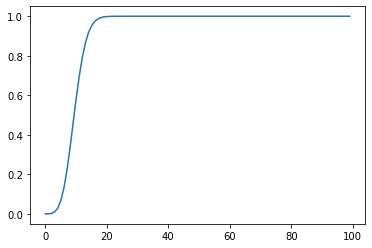

In [44]:
plt.plot(addK.累计概率)

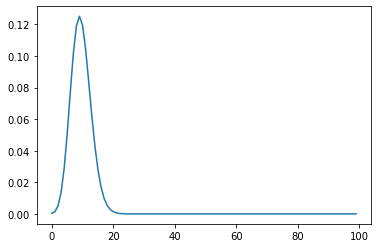

In [45]:
plt.plot(np.gradient(addK.累计概率.to_numpy()))

### 可以看到，累计的概率到k=20左右的时候，增加的效果逐渐降低

In [46]:
addK[20:30]

,k,Lambda,单次概率,累计概率
20,21,10.0,1.866081e-03,0.998412
21,22,10.0,8.886101e-04,0.999300
22,23,10.0,4.039137e-04,0.999704
23,24,10.0,1.756147e-04,0.999880
24,25,10.0,7.317277e-05,0.999953
25,26,10.0,2.926911e-05,0.999982
26,27,10.0,1.125735e-05,0.999994
27,28,10.0,4.169389e-06,0.999998
28,29,10.0,1.489067e-06,0.999999
29,30,10.0,5.134715e-07,1.000000


## 可以看到当冗余是概率的300%左右的时候，8点以前到能吃到早饭的概率为100%

In [47]:
addK10 = pocssonDistribution_to_table(10,9,0.1)
addK10

,k,Lambda,单次概率,累计概率
0,1,1.0,0.367879,0.367879
1,2,1.0,0.367879,0.735759
2,3,1.0,0.183940,0.919699
3,4,1.0,0.061313,0.981012
4,5,1.0,0.015328,0.996340
5,6,1.0,0.003066,0.999406
6,7,1.0,0.000511,0.999917
7,8,1.0,0.000073,0.999990
8,9,1.0,0.000009,0.999999


## 换一个例子，假如电话公司节假日客户同时通话的概率是60%

In [48]:
addK20 = pocssonDistribution_to_table(100,100,0.6)
addK20[addK20.k==10]

,k,Lambda,单次概率,累计概率
9,10,60.0,2.431808e-16,2.851508e-16


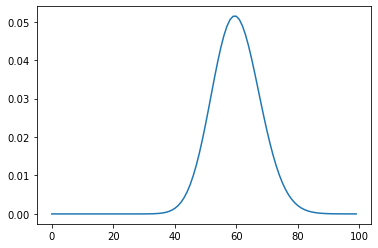

In [49]:
plt.plot(addK20.单次概率)

## 当只准备60%的客户数量的交换机时，一旦发生全客户群并发则会造成接通率直线下降

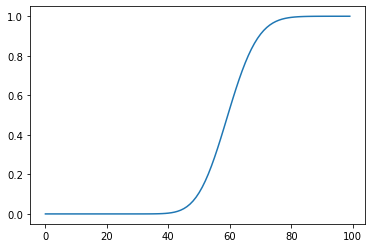

In [50]:
plt.plot(addK20.累计概率)

## 可以看到累计概率，也就是单位时间内某一用户能够接通的概率在k增大到100之间的变化曲线

In [51]:
addK20.累计概率[89:90]

89    0.999819
Name: 累计概率, dtype: float64